This notebook contains all necessary code in order to generate our final dataset ```./data_source/processed/dataset.csv```, from the raw source files located in ```./data_source/raw/*```.

In [1]:
import pandas as pd

pd.options.display.max_columns = 200
pd.options.display.max_rows = 5
pd.set_option('display.max_colwidth', 5000)

# 1. ONISEP - Higher Education Structures Dataset

A. Loading the dataset

In [2]:
onisep_dataset = pd.read_csv("./data_source/raw/onisep-ideo-structures_denseignement_superieur.csv", sep=";", low_memory=False)
onisep_dataset

,code UAI,n° SIRET,type d'établissement,nom,sigle,statut,tutelle,université de rattachement libellé,université de rattachement ID et URL Onisep,établissements liés libellés,établissements liés URL et ID Onisep,boîte postale,adresse,CP,commune,commune (COG),cedex,téléphone,arrondissement,département,académie,région,région (COG),longitude (X),latitude (Y),journées portes ouvertes,label génération 2024,URL et ID Onisep
0,0381516S,1.300214e+13,Institut universitaire de technologie,IUT 1 (site Grenoble - Gambetta),IUT 1,public,"Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation",Université Grenoble Alpes,www.onisep.fr/http/redirection/etablissement/slug/ENS.490,IUT 1 (campus - Saint-Martin-d'Hères) à Saint-Martin-d'Hères (38) | IUT 1 (site Grenoble - Claude Bernard) à Grenoble (38),www.onisep.fr/http/redirection/etablissement/slug/ENS.8231 | www.onisep.fr/http/redirection/etablissement/slug/ENS.18914,NaN,39-41 boulevard Gambetta,38000,Grenoble,38185,NaN,04 56 52 02 02,NaN,38 - Isère,Grenoble,Auvergne-Rhône-Alpes,84,5.725534,45.184863,NaN,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.18838
1,0270026G,1.927003e+13,"Lycée général, technologique ou polyvalent",Lycée Louise Michel,NaN,public,Ministère chargé de l'Éducation nationale et de la Jeunesse,NaN,NaN,NaN,NaN,NaN,23 rue d'Eragny,27140,Gisors,27284,NaN,02 32 27 69 80,NaN,27 - Eure,Normandie,Normandie,28,1.779960,49.286000,le 16/03/2024 de 09h00 à 12h00,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.14205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,0875078X,1.987067e+13,Institut national supérieur du professorat et de l'éducation,Institut national supérieur du professorat et de l'éducation,INSPÉ,public,"Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation",Université de Limoges,www.onisep.fr/http/redirection/etablissement/slug/ENS.182,Institut national supérieur du professorat et de l'éducation - antenne de Guéret à Guéret (23) | Institut national supérieur du professorat et de l'éducation - antenne de Tulle à Tulle (19),www.onisep.fr/http/redirection/etablissement/slug/ENS.13161 | www.onisep.fr/http/redirection/etablissement/slug/ENS.7602,NaN,"209 boulevard de Vanteaux, Campus Condorcet",87036,Limoges,87085,Cedex,05 55 01 76 86,NaN,87 - Haute-Vienne,Limoges,Nouvelle-Aquitaine,75,1.226521,45.822932,NaN,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.10450
8695,0860774Z,3.007263e+13,"Lycée général, technologique ou polyvalent",Lycée polyvalent privé Saint-Jacques de Compostelle,NaN,privé sous contrat,Ministère chargé de l'Éducation nationale et de la Jeunesse,NaN,NaN,Centre de formation Saint-Jacques de Compostelle à Poitiers (86) | Collège privé - ensemble scolaire Saint-Jacques de Compostelle à Poitiers (86),www.onisep.fr/http/redirection/etablissement/slug/ENS.18911 | www.onisep.fr/http/redirection/etablissement/slug/ENS.3534,NaN,2 avenue de la Révolution,86036,Poitiers,86194,Cedex,05 49 61 60 60,NaN,86 - Vienne,Poitiers,Nouvelle-Aquitaine,75,0.382796,46.585900,NaN,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.19629


B. Replace the multiple existing terms used to define  private institution status to a unique one. As such we obtain a binary categorization of a private and public status.

In [3]:
onisep_dataset['statut'].replace(["privé", "privé reconnu par l'Etat", "privé sous contrat", "privé hors contrat"], 'private', inplace=True)
onisep_dataset = onisep_dataset.loc[onisep_dataset['statut'].notnull()]

C. Only keep major secondary education institutions (Universities, Technical Universities, Business Schools, Engineering Schools, Political Science Institutes, Polytechnic Institutes)

In [4]:
onisep_dataset = onisep_dataset[~onisep_dataset["type d'établissement"].isin([
       'Lycée général, technologique ou polyvalent',
       "Centre de formation d'apprentis", 'Lycée professionnel',
       'École du secteur social', 'Unité de formation et de recherche',
       'Lycée agricole', "Institut national supérieur du professorat et de l'éducation",
       'Conservatoire régional', "École vétérinaire",
       "Service d'éducation spéciale et de soins à domicile", 'Centre de formation de fonctionnaires',
       'CREPS', 'Campus connecté','École de santé', 'Établissement national de sport',
       'Enseignement public à distance','École de formation sportive',
       "Établissement régional d'enseignement adapté",
       'Conservatoire départemental', 'Conservatoire national', "Autre établissement d'enseignement",
       'Maison familiale rurale', 'Centre de formation professionnelle'])]
print("List of institution types present in the dataset after applying the filter: \n", onisep_dataset["type d'établissement"].unique())

List of institution types present in the dataset after applying the filter: 
 ['Institut universitaire de technologie' 'Université'
 'Grande école de commerce' "École d'art" "École d'ingénieurs"
 'École de gestion et de commerce' 'École des beaux-arts'
 "Institut d'études politiques" "École d'architecture"
 'Institut national polytechnique']


D. Only keep the main structures, mother insititutions

In [5]:
onisep_dataset = onisep_dataset.loc[onisep_dataset['université de rattachement libellé'].isnull()]
onisep_dataset

,code UAI,n° SIRET,type d'établissement,nom,sigle,statut,tutelle,université de rattachement libellé,université de rattachement ID et URL Onisep,établissements liés libellés,établissements liés URL et ID Onisep,boîte postale,adresse,CP,commune,commune (COG),cedex,téléphone,arrondissement,département,académie,région,région (COG),longitude (X),latitude (Y),journées portes ouvertes,label génération 2024,URL et ID Onisep
5,0062205P,1.300257e+13,Université,Université Côte d'Azur,UniCA,public,"Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation",NaN,NaN,NaN,NaN,BP 2135,"28 avenue de Valrose, Grand Château Parc Valrose",6103,Nice,06088,Cedex 02,04 92 07 60 60,NaN,06 - Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur,93,7.265890,43.716760,NaN,Oui,www.onisep.fr/http/redirection/etablissement/slug/ENS.226
24,0755956S,8.342954e+13,Grande école de commerce,Neoma Business School,NEOMA BS,private,"Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation",NaN,NaN,CFA Reims Management School à Reims (51) | Neoma Business School à Mont-Saint-Aignan (76) | Neoma Business School à Reims (51),www.onisep.fr/http/redirection/etablissement/slug/ENS.17795 | www.onisep.fr/http/redirection/etablissement/slug/ENS.15747 | www.onisep.fr/http/redirection/etablissement/slug/ENS.7867,NaN,6 rue Vandrezanne,75013,Paris,75100,NaN,01 73 06 98 00,13.0,75 - Paris,Paris,Ile-de-France,11,2.355393,48.828113,NaN,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.17222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,0311381H,1.931138e+13,Institut national polytechnique,Toulouse INP,Toulouse INP,public,"Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation",NaN,NaN,NaN,NaN,BP 34038,6 allée Emile Monso,31029,Toulouse,31555,Cedex 04,05 34 32 30 00,NaN,31 - Haute-Garonne,Toulouse,Occitanie,76,1.454305,43.602716,NaN,Oui,www.onisep.fr/http/redirection/etablissement/slug/ENS.71
8693,0134334R,8.194642e+13,École de gestion et de commerce,My BS - My Business School l Aix-en-Provence,NaN,private,NaN,NaN,NaN,NaN,NaN,NaN,"75 rue Marcellin Berthelot, Pôle d'Activité d'Aix-les-Milles, Antelios, Bâtiment D",13290,Aix-en-Provence,13001,NaN,04.84.32.63.26,NaN,13 - Bouches-du-Rhône,Aix-Marseille,Provence-Alpes-Côte d'Azur,93,5.388992,43.272279,NaN,Non,www.onisep.fr/http/redirection/etablissement/slug/ENS.14278


E. Only keep features of interest

In [6]:
onisep_dataset = onisep_dataset[["code UAI", "nom", "statut","région"]]
onisep_dataset.loc[:, 'web'] = float('nan')
onisep_dataset


/tmp/ipykernel_120111/975365186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onisep_dataset.loc[:, 'web'] = float('nan')


,code UAI,nom,statut,région,web
5,0062205P,Université Côte d'Azur,public,Provence-Alpes-Côte d'Azur,NaN
24,0755956S,Neoma Business School,private,Ile-de-France,NaN
...,...,...,...,...,...
8692,0311381H,Toulouse INP,public,Occitanie,NaN
8693,0134334R,My BS - My Business School l Aix-en-Provence,private,Provence-Alpes-Côte d'Azur,NaN


F. Select the second ONISEP dataset in order to obtain the website from all institutions.

In [7]:

dataset_containing_urls = pd.read_csv("./data_source/raw/onisep-ideo-actions-de-formation.csv")

dataset_containing_urls = dataset_containing_urls[~dataset_containing_urls["FOR niveau de sortie"].isin(['Bac + 1', 'Bac + 2'])]
print(dataset_containing_urls["FOR niveau de sortie"].unique())
dataset_containing_urls

['Bac + 3' 'Bac + 5' 'Bac + 6' 'Bac + 4' 'Bac + 9 et plus' 'Bac + 7'
 'Bac + 8']


,Unnamed: 0,Action de Formation (AF) identifiant Onisep,Formation (FOR) libellé,FOR URL et ID Onisep,FOR indexation domaine web Onisep,FOR type,FOR nature du certificat,FOR URL référentiel,FOR niveau de sortie,Lieu d'enseignement (ENS) libellé,ENS URL et ID Onisep,ENS code UAI,ENS statut,ENS adresse,ENS code postal,ENS commune,ENS département,ENS académie,ENS région,ENS latitude,ENS longitude,ENS n° téléphone,ENS site web,ENS hébergement,ENS accessibilité,AF durée cycle standard,AF modalités scolarité,AF éléments d'enseignement,AF coût scolarité,AF coût d'inscription,AF modalités accueil,AF page web,AF date de modification
0,0,AF.59038,DN MADE mention espace,http://www.onisep.fr/http/redirection/formation/slug/FOR.5427,"arts, culture, artisanat/arts appliqués| arts, culture, artisanat/arts graphiques",diplôme national des métiers d'art et du design,Diplôme national ou diplôme d'État,NaN,Bac + 3,Lycée polyvalent Joseph Vallot,www.onisep.fr/http/redirection/etablissement/slug/ENS.10850,0340028W,public,rue du docteur Henri Mas,34700,Lodève,Hérault,Montpellier,Occitanie,43.7310,3.31485,04 67 88 48 60,https://joseph-vallot.mon-ent-occitanie.fr/,internat (homme/femme) : pour les sections professionnelles et technologiques uniquement,"Locaux accessibles : Accessibilité totale pour handicap moteur, Rampe d'accès, Ascenseur",3 ans,"temps plein, cours en présentiel","cadre de vie : matériaux, patrimoine et environnement",NaN,NaN,NaN,NaN,15/03/2023
3,3,AF.88186,administrateur de projets culturels,http://www.onisep.fr/http/redirection/formation/slug/FOR.8474,"arts, culture, artisanat/activités culturelles",formation d'école spécialisée,Formation inscrite au RNCP,https://www.francecompetences.fr/recherche/rncp/36701/,Bac + 5,Institut d'études supérieures des arts,www.onisep.fr/http/redirection/etablissement/slug/ENS.11396,0754494C,privé reconnu par l'Etat,6 rue Froment,75011,Paris,Paris,Paris,Ile-de-France,48.8569,2.37314,01 42 86 57 01,http://www.iesa.fr,sans hébergement,Locaux accessibles,1 an,"temps plein, cours en présentiel",NaN,NaN,NaN,NaN,http://www.iesa.fr/formation/marche-art/3e-cycle-art-bac-5,23/01/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28220,28220,AF.33167,FCIL Préparation à l'expertise automobile,http://www.onisep.fr/http/redirection/formation/slug/FOR.2028,"mécanique/automobile| matières premières, fabrication, industries/génie industriel",formation complémentaire d'initiative locale,Formation d'initiative locale,NaN,Bac + 3,Lycée du Hainaut,www.onisep.fr/http/redirection/etablissement/slug/ENS.11467,0590223X,public,"1 avenue Villars, BP 475",59322,Valenciennes,Nord,Lille,Hauts-de-France,50.3577,3.51035,03 27 22 95 95,https://hainaut.enthdf.fr/,internat (homme/femme),Locaux accessibles : Ascenseur,1 an,"temps plein, cours en présentiel",NaN,NaN,NaN,NaN,NaN,13/09/2023
28236,28236,AF.124602,FCIL bachelor mobilité intelligente,http://www.onisep.fr/http/redirection/formation/slug/FOR.9310,"électricité, électronique, robotique/électronique| électricité, électronique, robotique/électrotechnique| environnement, énergies, propreté/énergies| logistique, transport/transport",formation complémentaire d'initiative locale,Formation d'initiative locale,NaN,Bac + 3,Lycée polyvalent Joseph Gallieni,www.onisep.fr/http/redirection/etablissement/slug/ENS.16866,0312759F,public,"79 route d'Espagne, BP 44786",31047,Toulouse,Haute-Garonne,Toulouse,Occitanie,43.5734,1.42614,05 34 40 51 10,https://joseph-gallieni.mon-ent-occitanie.fr,internat (homme/femme),NaN,3 ans,"temps plein, cours en présentiel",NaN,NaN,NaN,NaN,https://joseph-gallieni.mon-ent-occitanie.fr/nos-formations/bachelor-mobilite-intelligente-46586.htm,13/11/2023


In [8]:
# Above level 6 corresponds to Licence, licence professionnelle, BUT : BUT : Bachelor universitaire de technologie (https://www.service-public.fr/particuliers/vosdroits/F199)
for index, row in onisep_dataset.iterrows():
    uai_code = row["code UAI"]
    corresponding_web_site = dataset_containing_urls.loc[dataset_containing_urls["ENS code UAI"] == uai_code]
    corresponding_web_site_value = corresponding_web_site.head(1)['ENS site web'].values
    if corresponding_web_site_value:
        onisep_dataset.at[index,'web'] = corresponding_web_site_value[0]
    
onisep_dataset = onisep_dataset.loc[onisep_dataset["web"].notna()]
onisep_dataset = onisep_dataset.rename(columns={'nom':'Name','statut':'Category', 'région':'Region', "web":'Url'})

onisep_dataset

/tmp/ipykernel_120111/1241639549.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if corresponding_web_site_value:


,code UAI,Name,Category,Region,Url
24,0755956S,Neoma Business School,private,Ile-de-France,https://www.neoma-bs.fr
27,0755958U,1984 School Of Design,private,Ile-de-France,http://www.1984-ecole.com
...,...,...,...,...,...
8682,0331877L,École supérieure des Beaux-Arts de Bordeaux,public,Nouvelle-Aquitaine,https://www.ebabx.fr
8693,0134334R,My BS - My Business School l Aix-en-Provence,private,Provence-Alpes-Côte d'Azur,http://www.my-bs.fr


# 2. Ministry of Higher Education & Research - Secondary Higher Education Annuary Dataset

In [9]:
second_dataset = pd.read_csv("./data_source/raw/annuaire-education-ministere-recherche.csv", sep=";", low_memory=False)
second_dataset

,etablissement_id_paysage,uo_lib,nom_court,sigle,type_d_etablissement,typologie_d_universites_et_assimiles,secteur_d_etablissement,vague_contractuelle,localisation,url,coordonnees,uai,anciens_codes_uai,siret,siren,rna,identifiant_wikidata,element_wikidata,identifiant_idref,identifiant_eter,identifiant_ror,element_ror,identifiant_pic,identifiant_orgref,identifiant_isni,element_isni,element_fundref,date_creation,texte_de_ref_creation_lib,texte_de_ref_creation,com_code,com_nom,uucr_id,uucr_nom,dep_id,dep_nom,aca_id,aca_nom,reg_id,reg_nom,reg_id_old,reg_nom_old,mention_distribution,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,pays_etranger_acheminement,numero_telephone_uai,statut_juridique_court,statut_juridique_long,compte_facebook,compte_twitter,compte_instagram,compte_flickr,compte_pinterest,flux_rss,compte_linkedin,compte_france_culture,compte_scribd,compte_scoopit,compte_tumblr,compte_youtube,compte_vimeo,compte_dailymotion,compte_github,wikipedia,wikipedia_en,scanr,hal,mooc,article,uo_lib_officiel,uo_lib_en,url_en,url_cn,url_es,url_de,url_it,universites_fusionnees,etablissement_experimental,champ_recherche,inscrits,inscrits_2010,inscrits_2011,inscrits_2012,inscrits_2013,inscrits_2014,inscrits_2015,inscrits_2016,inscrits_2017,inscrits_2018,inscrits_2019,inscrits_2020,inscrits_2021,inscrits_2022
0,fWJJA,Centrale Lyon,EC Lyon,NaN,École,NaN,public,Vague A,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Écully,https://www.ec-lyon.fr/,"45.78299,4.76927",0690187D,NaN,19690187000010,196901870,NaN,Q10177,https://www.wikidata.org/entity/Q10177,033894221,FR0153,05s6rge65,https://ror.org/05s6rge65,NaN,83157.0,0000 0001 2181 0799,http://www.isni.org/0000 0001 2181 0799,NaN,1857,NaN,NaN,69081,Écully,UU00760,Lyon,D069,Rhône,A10,Lyon,R84,Auvergne-Rhône-Alpes,R82,Rhône-Alpes,NaN,36 avenue Guy de Collongue,NaN,NaN,69134.0,Écully CEDEX,France,3.347219e+10,EPSCP,"Établissement public à caractère scientifique, culturel et professionnel",https://www.facebook.com/CentraleLyon,https://twitter.com/CentraleLyon,https://www.instagram.com/centralelyon/,NaN,NaN,http://www.ec-lyon.fr/taxonomy/term/1%2B2%2B3%2B4%2B5%2B6/0/feed,https://www.linkedin.com/school/ecole-centrale-de-lyon/,NaN,NaN,NaN,NaN,https://www.youtube.com/user/EcoleCentraleLyon,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/%C3%89cole_centrale_de_Lyon,https://en.wikipedia.org/wiki/%C3%89cole_centrale_de_Lyon,https://scanr.enseignementsup-recherche.gouv.fr/entite/196901870,NaN,NaN,à l',École centrale de Lyon,NaN,https://www.ec-lyon.fr/en,https://www.ec-lyon.fr/zh,https://www.ec-lyon.fr/es,NaN,NaN,NaN,NaN,École centrale lyonnaise pour l'industrie et le commerce;École centrale de Lyon;École centrale lyonnaise;Centrale Lyon;EC Lyon,https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-statistiques-sur-les-effectifs-d-etudiants-inscrits-par-etablissement-hcp/table/?sort=-annee_universitaire&refine.etablissement_id_paysage=fWJJA,1482.0,1390.0,1513.0,1633.0,1714.0,1774.0,1817.0,1907.0,1876.0,1842.0,2912.0,2916.0,2920.0
1,1tI7C,Centrale Méditerranée,NaN,NaN,École,NaN,public,Vague C,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouches-du-Rhône>Marseille-Aix-en-Provence>Marseille 13e,https://www.centrale-mediterranee.fr/fr,"43.34136,5.43829",0133774G,0132396J;0133401B;0130219T,19133340000015,191333400,NaN,Q273454,https://www.wikidata.org/entity/Q273454,163078998,FR0006,040baw385,https://ror.org/040baw385,NaN,7756351.0,0000 0004 1762 2703,http://www.isni.org/0000 0004 1762 2703,NaN,2003-10-02,Décret n° 2003-929 du 29 septembre 2003 portant création de l'Ecole généraliste d'ingénieurs de Marseille,https://www.legifrance.gouv.fr/jorf/id/JORFTEXT000000794748/,13213,Marseille 13e,UU00759,Marseille-Aix-en-Provence,D013,Bouches-du-Rhône,A02,Aix-Marseille,R93,Provence-Alpes-Côte d'Azur,R93,Provence-Alpes-Côte d'Azur,Pôle de l'Étoile - Technopôle de Château-Gombert,38 rue Frédéric-Joliot-Curie,NaN,NaN,13451.0,Marseille CEDEX 13,France,3.349128e+10,EPSCP,"Établissement publ

A. Only keep insititutions with an existing insitution code and a web url.

In [10]:
second_dataset = second_dataset[second_dataset['url'].notna()]
second_dataset = second_dataset[second_dataset['uai'].notna()]
second_dataset['secteur_d_etablissement'].replace(["privé"], 'private', inplace=True)
second_dataset

,etablissement_id_paysage,uo_lib,nom_court,sigle,type_d_etablissement,typologie_d_universites_et_assimiles,secteur_d_etablissement,vague_contractuelle,localisation,url,coordonnees,uai,anciens_codes_uai,siret,siren,rna,identifiant_wikidata,element_wikidata,identifiant_idref,identifiant_eter,identifiant_ror,element_ror,identifiant_pic,identifiant_orgref,identifiant_isni,element_isni,element_fundref,date_creation,texte_de_ref_creation_lib,texte_de_ref_creation,com_code,com_nom,uucr_id,uucr_nom,dep_id,dep_nom,aca_id,aca_nom,reg_id,reg_nom,reg_id_old,reg_nom_old,mention_distribution,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,pays_etranger_acheminement,numero_telephone_uai,statut_juridique_court,statut_juridique_long,compte_facebook,compte_twitter,compte_instagram,compte_flickr,compte_pinterest,flux_rss,compte_linkedin,compte_france_culture,compte_scribd,compte_scoopit,compte_tumblr,compte_youtube,compte_vimeo,compte_dailymotion,compte_github,wikipedia,wikipedia_en,scanr,hal,mooc,article,uo_lib_officiel,uo_lib_en,url_en,url_cn,url_es,url_de,url_it,universites_fusionnees,etablissement_experimental,champ_recherche,inscrits,inscrits_2010,inscrits_2011,inscrits_2012,inscrits_2013,inscrits_2014,inscrits_2015,inscrits_2016,inscrits_2017,inscrits_2018,inscrits_2019,inscrits_2020,inscrits_2021,inscrits_2022
0,fWJJA,Centrale Lyon,EC Lyon,NaN,École,NaN,public,Vague A,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Écully,https://www.ec-lyon.fr/,"45.78299,4.76927",0690187D,NaN,19690187000010,196901870,NaN,Q10177,https://www.wikidata.org/entity/Q10177,033894221,FR0153,05s6rge65,https://ror.org/05s6rge65,NaN,83157.0,0000 0001 2181 0799,http://www.isni.org/0000 0001 2181 0799,NaN,1857,NaN,NaN,69081,Écully,UU00760,Lyon,D069,Rhône,A10,Lyon,R84,Auvergne-Rhône-Alpes,R82,Rhône-Alpes,NaN,36 avenue Guy de Collongue,NaN,NaN,69134.0,Écully CEDEX,France,3.347219e+10,EPSCP,"Établissement public à caractère scientifique, culturel et professionnel",https://www.facebook.com/CentraleLyon,https://twitter.com/CentraleLyon,https://www.instagram.com/centralelyon/,NaN,NaN,http://www.ec-lyon.fr/taxonomy/term/1%2B2%2B3%2B4%2B5%2B6/0/feed,https://www.linkedin.com/school/ecole-centrale-de-lyon/,NaN,NaN,NaN,NaN,https://www.youtube.com/user/EcoleCentraleLyon,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/%C3%89cole_centrale_de_Lyon,https://en.wikipedia.org/wiki/%C3%89cole_centrale_de_Lyon,https://scanr.enseignementsup-recherche.gouv.fr/entite/196901870,NaN,NaN,à l',École centrale de Lyon,NaN,https://www.ec-lyon.fr/en,https://www.ec-lyon.fr/zh,https://www.ec-lyon.fr/es,NaN,NaN,NaN,NaN,École centrale lyonnaise pour l'industrie et le commerce;École centrale de Lyon;École centrale lyonnaise;Centrale Lyon;EC Lyon,https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-statistiques-sur-les-effectifs-d-etudiants-inscrits-par-etablissement-hcp/table/?sort=-annee_universitaire&refine.etablissement_id_paysage=fWJJA,1482.0,1390.0,1513.0,1633.0,1714.0,1774.0,1817.0,1907.0,1876.0,1842.0,2912.0,2916.0,2920.0
1,1tI7C,Centrale Méditerranée,NaN,NaN,École,NaN,public,Vague C,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouches-du-Rhône>Marseille-Aix-en-Provence>Marseille 13e,https://www.centrale-mediterranee.fr/fr,"43.34136,5.43829",0133774G,0132396J;0133401B;0130219T,19133340000015,191333400,NaN,Q273454,https://www.wikidata.org/entity/Q273454,163078998,FR0006,040baw385,https://ror.org/040baw385,NaN,7756351.0,0000 0004 1762 2703,http://www.isni.org/0000 0004 1762 2703,NaN,2003-10-02,Décret n° 2003-929 du 29 septembre 2003 portant création de l'Ecole généraliste d'ingénieurs de Marseille,https://www.legifrance.gouv.fr/jorf/id/JORFTEXT000000794748/,13213,Marseille 13e,UU00759,Marseille-Aix-en-Provence,D013,Bouches-du-Rhône,A02,Aix-Marseille,R93,Provence-Alpes-Côte d'Azur,R93,Provence-Alpes-Côte d'Azur,Pôle de l'Étoile - Technopôle de Château-Gombert,38 rue Frédéric-Joliot-Curie,NaN,NaN,13451.0,Marseille CEDEX 13,France,3.349128e+10,EPSCP,"Établissement publ

B. Keep and rename the columns of importance (UAI, Name, Status, Region, URL)

In [11]:
# Only keep features of interest
second_dataset = second_dataset[["uai", "uo_lib", "secteur_d_etablissement","reg_nom", 'url']]
second_dataset = second_dataset.rename(columns={'uai':'code UAI','uo_lib':'Name','secteur_d_etablissement':'Category', 'reg_nom':'Region', "url":'Url'})
second_dataset

,code UAI,Name,Category,Region,Url
0,0690187D,Centrale Lyon,public,Auvergne-Rhône-Alpes,https://www.ec-lyon.fr/
1,0133774G,Centrale Méditerranée,public,Provence-Alpes-Côte d'Azur,https://www.centrale-mediterranee.fr/fr
...,...,...,...,...,...
248,0931238R,Université Sorbonne Paris Nord,public,Île-de-France,http://www.univ-paris13.fr/
249,0311383K,Université Toulouse - Jean Jaurès,public,Occitanie,https://www.univ-tlse2.fr/


C. Duplicate rows with multiple UAI codes

In [12]:
# Arrange all rows which have several UAI codes
for index, row in second_dataset.iterrows():
    uai_code = row["code UAI"]
    if ";" in uai_code:
        for code in uai_code.split(";"):
            new_entry = pd.DataFrame([{'code UAI':code, 'Name': row["Name"], 'Category': row["Category"], "Region": row["Region"], 'Url': row["Url"]}])
            second_dataset = pd.concat([second_dataset, new_entry], ignore_index=False)
        second_dataset.drop(index, inplace=True)

second_dataset.sort_values(by="Name", inplace=True)
second_dataset

,code UAI,Name,Category,Region,Url
29,0134009M,Aix-Marseille Université,public,Provence-Alpes-Côte d'Azur,https://www.univ-amu.fr/
182,0753237L,Arts et Métiers Sciences et Technologies,public,Île-de-France,https://artsetmetiers.fr/
...,...,...,...,...,...
206,0442278M,École supérieure du bois,private,Pays de la Loire,https://www.ecoledubois.fr/
223,0490072M,École supérieure d’agriculture,private,Pays de la Loire,https://www.groupe-esa.com/


# Merging Datasets

A. Concatenate the two dataframes.

In [13]:
concatenated_df = pd.concat([onisep_dataset, second_dataset], ignore_index=True)
concatenated_df

,code UAI,Name,Category,Region,Url
0,0755956S,Neoma Business School,private,Ile-de-France,https://www.neoma-bs.fr
1,0755958U,1984 School Of Design,private,Ile-de-France,http://www.1984-ecole.com
...,...,...,...,...,...
954,0442278M,École supérieure du bois,private,Pays de la Loire,https://www.ecoledubois.fr/
955,0490072M,École supérieure d’agriculture,private,Pays de la Loire,https://www.groupe-esa.com/


B. We standardize the URL

In [14]:
from urllib.parse import urlparse

# Remove pending slashes to recognize duplicates
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Apply function to DataFrame
concatenated_df['Url'] = concatenated_df['Url'].apply(extract_domain)
concatenated_df

,code UAI,Name,Category,Region,Url
0,0755956S,Neoma Business School,private,Ile-de-France,www.neoma-bs.fr
1,0755958U,1984 School Of Design,private,Ile-de-France,www.1984-ecole.com
...,...,...,...,...,...
954,0442278M,École supérieure du bois,private,Pays de la Loire,www.ecoledubois.fr
955,0490072M,École supérieure d’agriculture,private,Pays de la Loire,www.groupe-esa.com


C. Group togetger the 'Island Regions', remove insitutions located abroad and standardize the naming of regions

In [15]:
# Conform to the the standard naming of the Ile de France Region
concatenated_df['Region'].replace('Île-de-France', 'Ile-de-France', inplace=True)

# Concatenate all island regions into one.
concatenated_df['Region'].replace("Collectivités d'outre-mer", "Outre-mer", inplace=True)
concatenated_df['Region'].replace("Mayotte", "Outre-mer", inplace=True)
concatenated_df['Region'].replace("Martinique", "Outre-mer", inplace=True)
concatenated_df['Region'].replace("La Réunion", "Outre-mer", inplace=True)
concatenated_df['Region'].replace("Guyane", "Outre-mer", inplace=True)
concatenated_df['Region'].replace("Guadeloupe", "Outre-mer", inplace=True)

# Remove insititutions located abroad
concatenated_df = concatenated_df[concatenated_df['Region'] != 'Étranger']

print("Unique regions present in the dataset are: \n", concatenated_df["Region"].unique())
concatenated_df

Unique regions present in the dataset are: 
 ['Ile-de-France' 'Hauts-de-France' 'Auvergne-Rhône-Alpes' 'Normandie'
 'Occitanie' "Provence-Alpes-Côte d'Azur" 'Grand Est'
 'Bourgogne-Franche-Comté' 'Nouvelle-Aquitaine' 'Bretagne'
 'Centre-Val de Loire' 'Pays de la Loire' 'Outre-mer' 'Corse']


,code UAI,Name,Category,Region,Url
0,0755956S,Neoma Business School,private,Ile-de-France,www.neoma-bs.fr
1,0755958U,1984 School Of Design,private,Ile-de-France,www.1984-ecole.com
...,...,...,...,...,...
954,0442278M,École supérieure du bois,private,Pays de la Loire,www.ecoledubois.fr
955,0490072M,École supérieure d’agriculture,private,Pays de la Loire,www.groupe-esa.com


D. Remove Duplicate Elements obtained from concatenation.

In [16]:
concatenated_df = concatenated_df.drop_duplicates(subset=['code UAI', 'Region'])
concatenated_df

,code UAI,Name,Category,Region,Url
0,0755956S,Neoma Business School,private,Ile-de-France,www.neoma-bs.fr
1,0755958U,1984 School Of Design,private,Ile-de-France,www.1984-ecole.com
...,...,...,...,...,...
945,0951803U,École supérieure de chimie organique et minérale,private,Hauts-de-France,www.escom.fr
950,0921929X,École supérieure des techniques aéronautiques et de construction automobile,private,Ile-de-France,www.estaca.fr


In [17]:
concatenated_df = concatenated_df.drop_duplicates(subset=["Name", "Region"])
concatenated_df = concatenated_df.drop_duplicates(subset=["Url", "Region"])
concatenated_df

,code UAI,Name,Category,Region,Url
0,0755956S,Neoma Business School,private,Ile-de-France,www.neoma-bs.fr
1,0755958U,1984 School Of Design,private,Ile-de-France,www.1984-ecole.com
...,...,...,...,...,...
926,0310153Y,École nationale vétérinaire de Toulouse,public,Occitanie,www.envt.fr
929,0694123G,École normale supérieure de Lyon,public,Auvergne-Rhône-Alpes,www.ens-lyon.eu


In [18]:
# Arrange order of columns
del concatenated_df["code UAI"]
# Sort Alphabetically by Region
concatenated_df = concatenated_df.sort_values(by="Region")
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.rename_axis('ID', inplace=True)
concatenated_df

,Name,Category,Region,Url
ID,,,,
0,École normale supérieure de Lyon,public,Auvergne-Rhône-Alpes,www.ens-lyon.eu
1,Ecole supérieure d'économie d'art et de communication,private,Auvergne-Rhône-Alpes,www.ecole-eac.com
...,...,...,...,...
718,ESSCA école de management,private,Provence-Alpes-Côte d'Azur,www.essca.fr
719,Institut d'enseignement supérieur de la musique - Europe et Méditerranée - IESM,public,Provence-Alpes-Côte d'Azur,www.iesm.fr


5. Save to csv file.

In [19]:
concatenated_df.to_csv("./data_source/processed/dataset.csv")

# Graphs

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


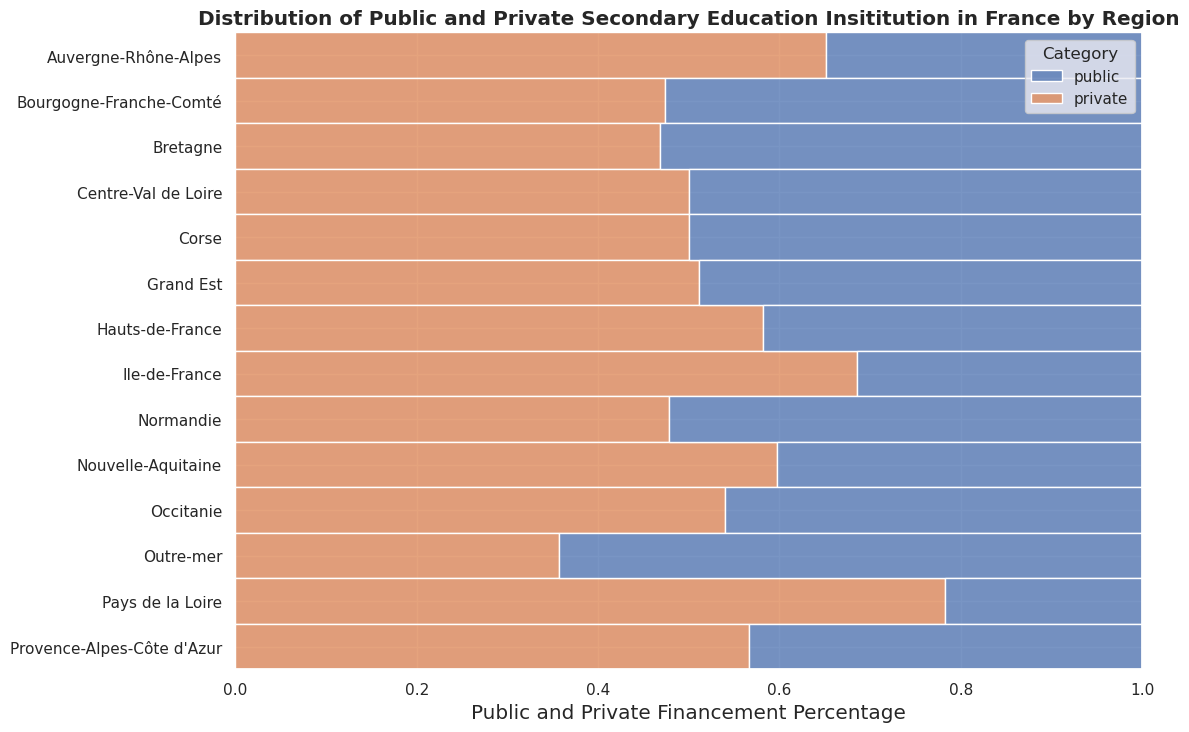

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(
    data=concatenated_df,
    hue="Category", y="Region",
    multiple="fill", stat="proportion",
    discrete=True
)

fig = ax.get_figure()
ax.set_xlabel("Public and Private Financement Percentage", size="large")
ax.set_ylabel("")
ax.set_title('Distribution of Public and Private Secondary Education Insititution in France by Region',  size="large", fontweight="bold", horizontalalignment='center')

fig.savefig('distribution_by_region_and_financement.png', bbox_inches='tight')